# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Yani Yulianti
- **Email:** yaniyul2712@gmail.com
- **ID Dicoding:** yaniyul

## Menentukan Pertanyaan Bisnis

- Pada bulan apa kualitas udara cenderung paling buruk dan paling baik?
- Bagaimana kualitas udara pada daerah Dongsi di hari-hari mendatang?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Membaca file CSV

In [2]:
all_df = pd.read_csv('dashboard/all_data.csv')

Menampilkan data teratas

In [3]:
all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

Menampilkan informasi dataframe

In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382168 entries, 0 to 382167
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       382168 non-null  int64  
 1   year     382168 non-null  int64  
 2   month    382168 non-null  int64  
 3   day      382168 non-null  int64  
 4   hour     382168 non-null  int64  
 5   PM2.5    382168 non-null  float64
 6   PM10     382168 non-null  float64
 7   SO2      382168 non-null  float64
 8   NO2      382168 non-null  float64
 9   CO       382168 non-null  float64
 10  O3       382168 non-null  float64
 11  TEMP     382168 non-null  float64
 12  PRES     382168 non-null  float64
 13  DEWP     382168 non-null  float64
 14  RAIN     382168 non-null  float64
 15  wd       382168 non-null  object 
 16  WSPM     382168 non-null  float64
 17  station  382168 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 52.5+ MB


Mengecek missing values pada dataframe

In [5]:
all_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Mengecek duplikasi pada dataframe

In [6]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan statistik dari dataframe

In [7]:
all_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,17955.931070,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
std,10001.787087,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,9610.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,18103.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,26515.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

Menghapus baris dengan nilai kosong (NaN)

In [8]:
all_df.dropna(axis=0, inplace=True)

Menghitung jumlah baris dengan nilai kosong (NaN)

In [9]:
all_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Menyalin dataframe yang sudah dibersihkan ke dalam variabel "data"

In [10]:
data = all_df.copy()

## Exploratory Data Analysis (EDA)

### Explore ...

Mengkonversi feature "year", "month", "day" dan "hour" ke dalam feature "datetime"

In [11]:
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])

Menghitung Rata-Rata PM2.5 per Bulan

In [12]:
monthly_avg_pm25 = data.groupby('month')['PM2.5'].mean()

In [13]:
worst_month = monthly_avg_pm25.idxmax()
best_month = monthly_avg_pm25.idxmin()
print(f"Bulan dengan kualitas udara paling buruk (PM2.5 tertinggi): {worst_month}")
print(f"Bulan dengan kualitas udara paling baik (PM2.5 terendah): {best_month}")

Bulan dengan kualitas udara paling buruk (PM2.5 tertinggi): 12
Bulan dengan kualitas udara paling baik (PM2.5 terendah): 8


Melakukan filter data untuk stasiun 'Dongsi'

In [14]:
dongsi_data = data[data['station'] == 'Dongsi']

Mengubah kolom tanggal menjadi objek datetime

In [15]:
dongsi_data['datetime'] = pd.to_datetime(dongsi_data[['year', 'month', 'day', 'hour']])

C:\Users\yaniyul\AppData\Local\Temp\ipykernel_8900\742022869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dongsi_data['datetime'] = pd.to_datetime(dongsi_data[['year', 'month', 'day', 'hour']])


Memilih kolom numerik untuk pengambilan sampel ulang

In [16]:
numeric_columns = dongsi_data.select_dtypes(include=[np.number]).columns

Contoh mengulang data ke rata-rata harian

In [17]:
dongsi_daily_avg = dongsi_data.resample('D', on='datetime')[numeric_columns].mean()

Membuat tanggal untuk prediksi masa mendatang

In [18]:
future_dates = [dongsi_daily_avg.index[-1] + DateOffset(days=i) for i in range(1, 8)]
future_data = pd.DataFrame({'datetime': future_dates})

Menggunakan rata-rata 7 hari terakhir sebagai dasar untuk memproyeksikan nilai di masa mendatang

In [19]:
recent_mean = dongsi_daily_avg['PM2.5'].tail(7).mean()

Menambahkan nilai PM2.5 yang diproyeksikan untuk tanggal yang akan datang

In [20]:
future_data['PM2.5'] = recent_mean

Menggabungkan data historis dan masa mendatang

In [21]:
dongsi_extended = pd.concat([dongsi_daily_avg.reset_index(), future_data])

## Visualization & Explanatory Analysis

### Pertanyaan 1:

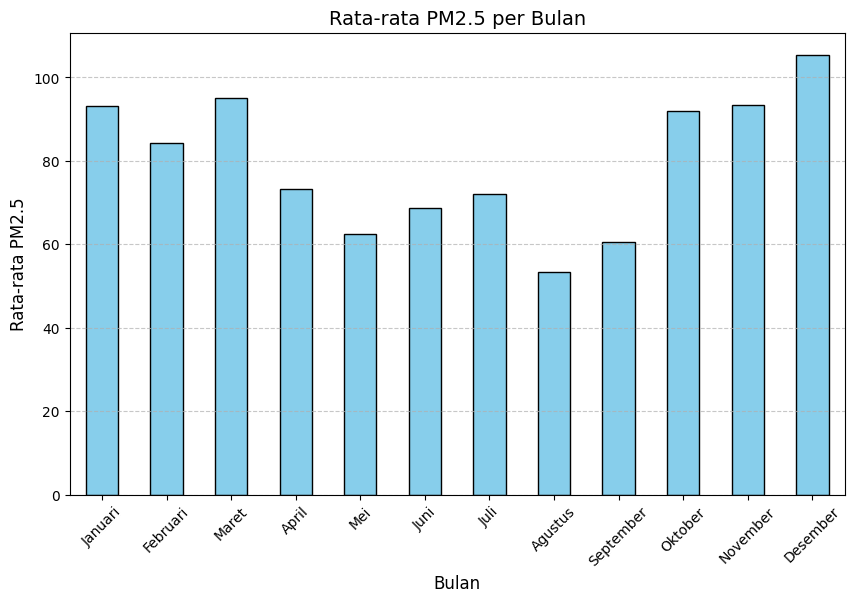

In [22]:
plt.figure(figsize=(10, 6))
monthly_avg_pm25.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan judul dan label
plt.title('Rata-rata PM2.5 per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata PM2.5', fontsize=12)

# Mengubah angka bulan menjadi nama bulan dengan rotasi 45 derajat
bulan_names = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
plt.xticks(ticks=range(12), labels=bulan_names, rotation=45)

# Menambahkan grid dan menampilkan plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2:

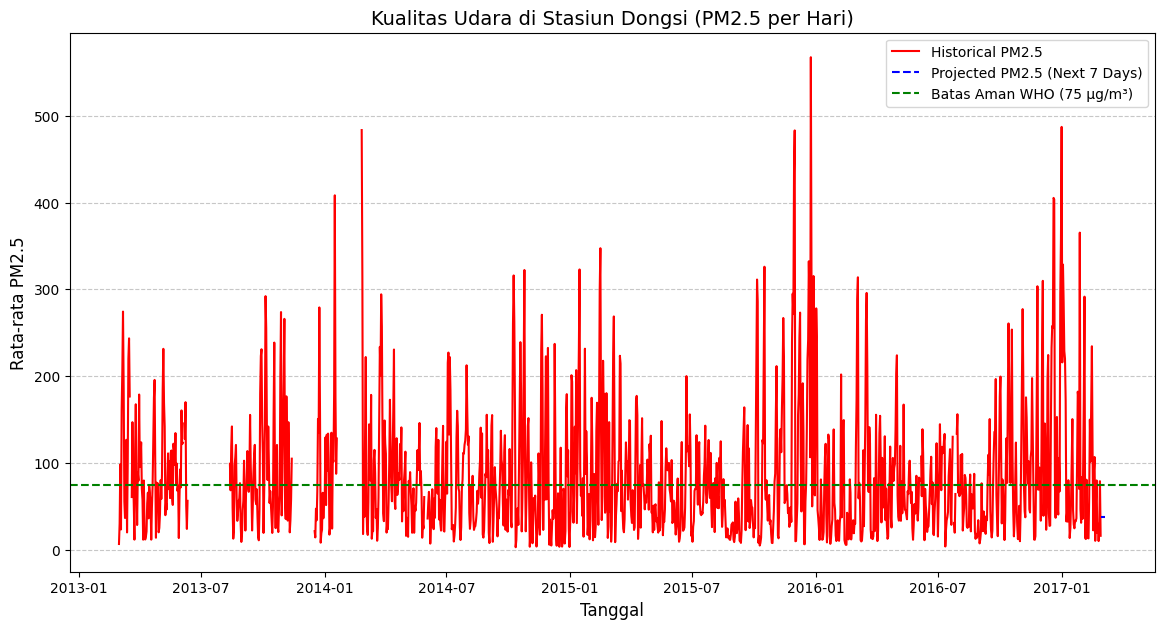

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(dongsi_daily_avg.index, dongsi_daily_avg['PM2.5'], label='Historical PM2.5', color='red', linewidth=1.5)
plt.plot(future_data['datetime'], future_data['PM2.5'], label='Projected PM2.5 (Next 7 Days)', color='blue', linestyle='--')

# Menambahkan judul dan label
plt.title('Kualitas Udara di Stasiun Dongsi (PM2.5 per Hari)', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Rata-rata PM2.5', fontsize=12)
plt.axhline(75, color='green', linestyle='--', label='Batas Aman WHO (75 µg/m³)')
plt.legend()

# Menambahkan grid dan menampilkan plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusion

### Conclution pertanyaan 1
Berdasarkan analisis di atas, kualitas udara cenderung paling buruk yaitu pada bulan Desember dengan nilai rata-rata PM2.5 tertinggi dan kualitas udara cenderung paling baik yaitu pada bulan Agustus dengan nilai rata-rata PM2.5 terendah.

### Conclution pertanyaan 2
Berdasarkan analisis di atas, kualitas udara pada daerah Dongsi di hari-hari mendatang terlihat tidak stabil. Grafik menunjukkan bahwa rata-rata konsentrasi PM2.5 di Stasiun Dongsi mengalami fluktuasi besar selama periode 2013 hingga 2017 dan batas aman PM2.5 yang ditetapkan oleh WHO (75 µg/m³) sering dilampaui, terlihat dari mayoritas data berada di atas garis hijau putus-putus.
